<a href="https://colab.research.google.com/github/aroshaniw/22060316/blob/main/brain_stroke_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization using statistical graphics
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data
import numpy as np  # For numerical operations and working with arrays
import matplotlib.cm as cm  # For working with color maps in Matplotlib

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # For encoding categorical variables and scaling numerical data
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # For implementing logistic regression model
from sklearn.ensemble import RandomForestClassifier  # For implementing a random forest classifier model
from sklearn.tree import DecisionTreeClassifier  # For implementing a decision tree classifier model
from sklearn.svm import SVC  # For implementing a support vector machine classifier
from sklearn.tree import plot_tree  # For visualizing decision trees
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model accuracy and generating a classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score  # For evaluating model performance using confusion matrix, ROC curve, and AUC score
from sklearn.metrics import confusion_matrix  # For calculating the confusion matrix to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluating model performance with accuracy, precision, recall, F1 score, and confusion matrix
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets by oversampling the minority class using SMOTE (Synthetic Minority Over-sampling Technique)
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and performing hyperparameter tuning using GridSearchCV
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # For comprehensive model evaluation using multiple metrics


Data loads from the "brain_stroke.csv" file into a DataFrame called stroke_data using the pandas library.

In [ ]:
# Load the dataset
stroke_data = pd.read_csv("/content/brain_stroke.csv")

Modified the dataset by converting the values in the 'age' column from decimal numbers to whole numbers, so now all ages are represented without any decimal points.

In [ ]:
# Convert the 'age' column from float to integer to truncate decimal values, ensuring all ages are whole numbers
stroke_data['age'] = stroke_data['age'].astype(int)

# Save the modified dataset to a new CSV file without including the index column in the output file
stroke_data.to_csv("/content/modified_brain_stroke.csv", index=False)

print("The modified dataset has been saved as 'modified_brain_stroke.csv'.")

The modified dataset has been saved as 'modified_brain_stroke.csv'.


This code displays the first few rows of the stroke_data DataFrame

In [ ]:
# Display the first few rows of the dataset
stroke_data.head()

gender  age  hypertension  heart_disease ever_married      work_type  \
0    Male   67             0              1          Yes        Private   
1    Male   80             0              1          Yes        Private   
2  Female   49             0              0          Yes        Private   
3  Female   79             1              0          Yes  Self-employed   
4    Male   81             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

**Finding Missing Values**

A missing value is no of data recorded for the variable in the dataset, appearing as an empty or null entry that may affect the analysis.

In [ ]:
# Check for missing values in each column and sum them up
missing_values = stroke_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


**Finding Duplicate Rows:**

Finding duplicate rows is identifying rows in a dataset that have identical values across all or specific columns. It is lead to biased or incorrect analysis.

In [ ]:
# Calculate the number of duplicated rows in the DataFrame 'stroke_data'
duplicated_rows = stroke_data.duplicated().sum()

# Print the number of duplicated rows in the DataFrame 'stroke_data'
print("Number of duplicated rows:", duplicated_rows)

Number of duplicated rows: 0


**Lable Encording Categorical Variables**

LabelEncoder is used to convert categorical variables into numeric labels, assigning a unique integer to each category, enabling the data for machine learning algorithms.

In [ ]:
# Initialize the LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# Define a list of column names that represent categorical variables in the dataset
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each column in the list of categorical columns
for column in categorical_columns:
    # Encode the current categorical column by transforming its values to numeric labels
    # The fit_transform() method first fits the label encoder to the unique values in the column and then transforms these values into integers
    stroke_data[column] = label_encoder.fit_transform(stroke_data[column])

# Display the first few rows of the dataset to verify that the categorical variables are successfully encoded
print("\nEncoded categorical variables:\n", stroke_data.head())


Encoded categorical variables:
    gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1   67             0              1             1          1   
1       1   80             0              1             1          1   
2       0   49             0              0             1          1   
3       0   79             1              0             1          2   
4       1   81             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1  


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) involves summarizing and visualizing the main characteristics of a dataset to identifies general patterns

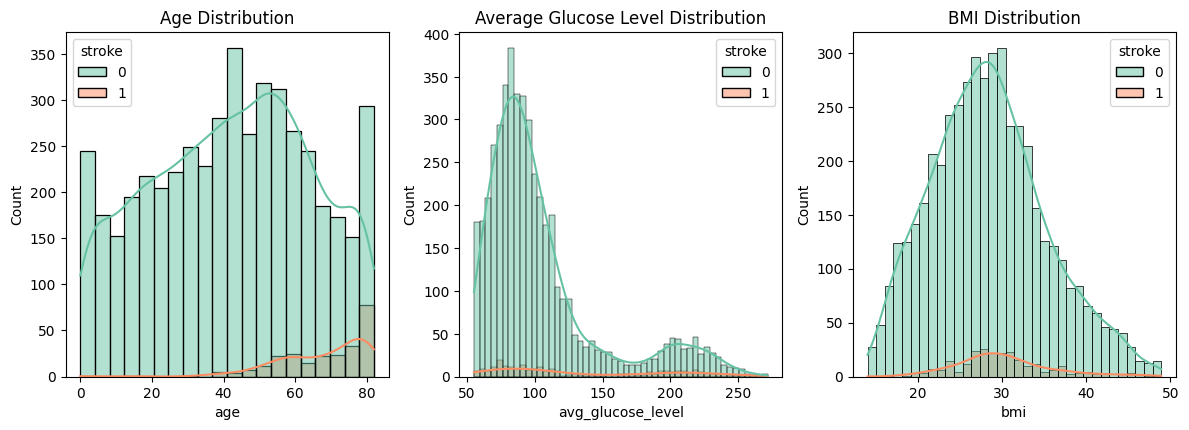

In [ ]:
# Create a figure with a specified size of 12x8 inches for the plots
plt.figure(figsize=(12, 8))

# Create the first subplot in a grid layout with 2 rows and 3 columns, positioned at the first cell (1st row, 1st column)
plt.subplot(2, 3, 1)
# Plot a histogram of the 'age' variable with a kernel density estimate (KDE) overlay,
# color-coded by the 'stroke' variable using the 'Set2' color palette, and divide the data into 20 bins
sns.histplot(data=stroke_data, x='age', hue='stroke', kde=True, palette='Set2', bins=20)
# Set the title of the subplot to 'Age Distribution'
plt.title('Age Distribution')

# Create the second subplot in the same 2x3 grid layout, positioned at the second cell (1st row, 2nd column)
plt.subplot(2, 3, 2)
# Plot a histogram of the 'avg_glucose_level' variable with a KDE overlay, color-coded by the 'stroke' variable using the 'Set2' palette
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='stroke', kde=True, palette='Set2')
# Set the title of the subplot to 'Average Glucose Level Distribution'
plt.title('Average Glucose Level Distribution')

# Create the third subplot in the same 2x3 grid layout, positioned at the third cell (1st row, 3rd column)
plt.subplot(2, 3, 3)
# Plot a histogram of the 'bmi' variable with a KDE overlay, color-coded by the 'stroke' variable using the 'Set2' palette
sns.histplot(data=stroke_data, x='bmi', hue='stroke', kde=True, palette='Set2')
# Set the title of the subplot to 'BMI Distribution'
plt.title('BMI Distribution')

# Adjust the layout of the figure to ensure that subplots do not overlap with each other
plt.tight_layout()

# Display the plots
plt.show()


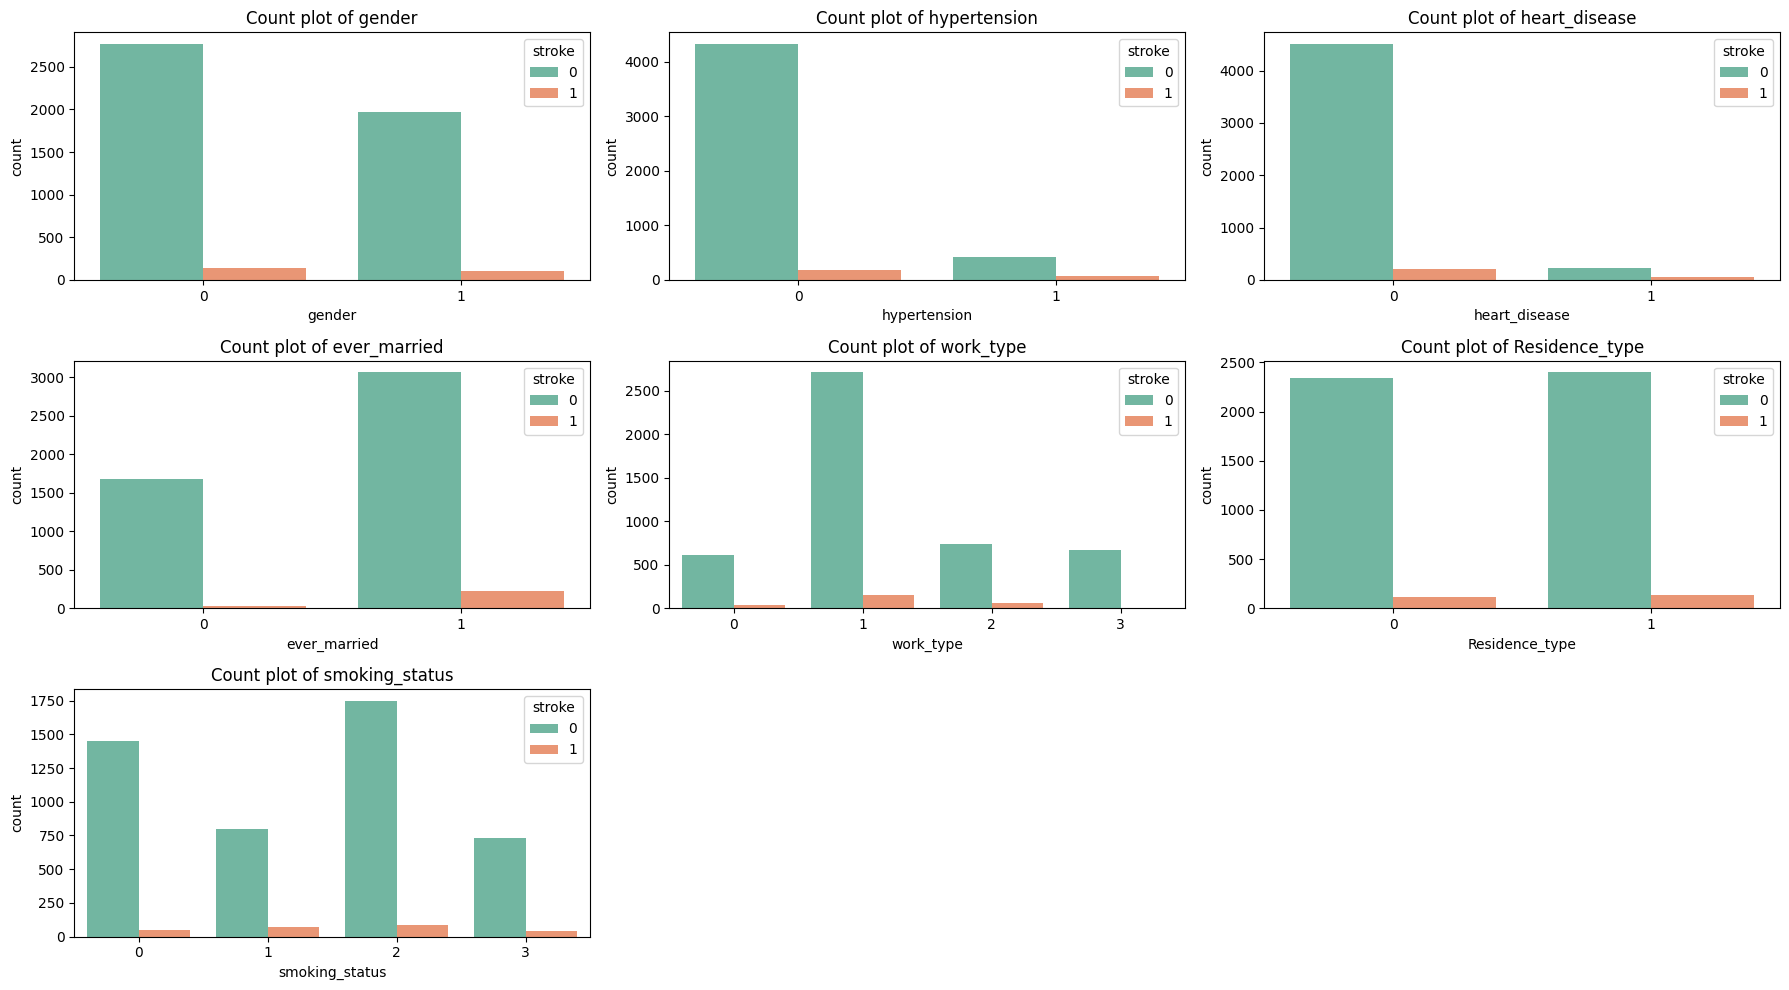

In [ ]:
# Define a list of categorical features in the dataset to be visualized using count plots
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create a new figure with a larger size of 18x10 inches for the count plots
plt.figure(figsize=(18, 10))
# Loop through each categorical feature in the list and create a corresponding count plot
for i, feature in enumerate(categorical_features):
    # Create a subplot in a grid layout with 3 rows and 3 columns, positioning it at the (i+1)th cell
    plt.subplot(3, 3, i+1)
    # Plot a count plot for the current categorical feature, with bars color-coded by the 'stroke' variable using the 'Set2' color palette
    sns.countplot(x=stroke_data[feature], hue=stroke_data['stroke'], palette='Set2')
    # Set the title for this subplot to 'Count plot of {feature}', dynamically using the feature name
    plt.title(f'Count plot of {feature}')

# Adjust the layout of the figure to ensure that subplots do not overlap with each other
plt.tight_layout()

# Display the plots
plt.show()


 **Visualization Heat Map**

A correlation matrix shows the relationship between variables in a dataset, with values ranging from -1 to 1. A heat map visualizes this matrix, using color gradients to represent the strength and direction of correlations. It helps quickly identify strong correlations and patterns  between variables.

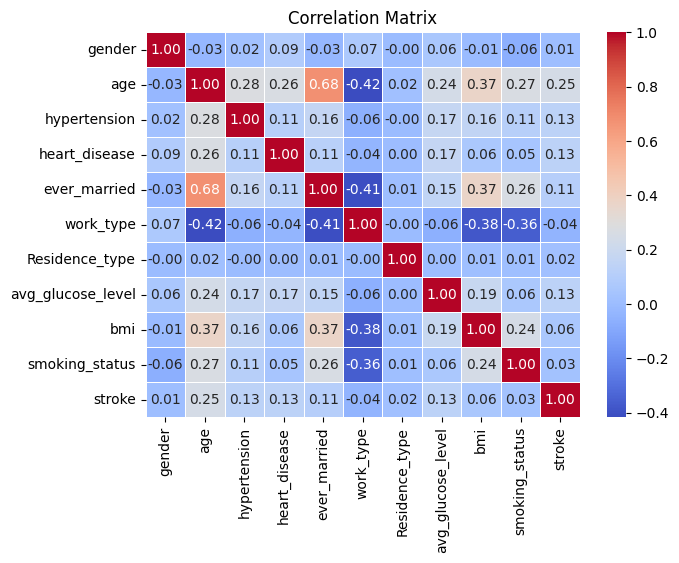

In [ ]:
# Compute the correlation matrix for the dataset to analyze the relationships between variables
# The correlation matrix contains correlation coefficients, indicating the strength and direction of the linear relationship between pairs of variables
correlation_matrix = stroke_data.corr()

# Create a new figure for the heatmap with a specified size of 7x5 inches
plt.figure(figsize=(7, 5))

# Generate a heatmap to visualize the correlation matrix using seaborn's heatmap function
sns.heatmap(correlation_matrix,  # Provide the computed correlation matrix to the heatmap function
            annot=True,  # Annotate each cell in the heatmap with the corresponding correlation coefficient value
            cmap='coolwarm',  # Use the 'coolwarm' colormap to color the heatmap, where cool colors (blue)
                              # represent negative correlations and warm colors (red) represent positive correlations
            fmt=".2f",  # Format the annotation text within the cells to show numbers with 2 decimal places for clarity
            linewidths=0.5)  # Set the line width between cells to 0.5 to separate the cells clearly

# Set the title of the heatmap to 'Correlation Matrix' for context
plt.title('Correlation Matrix')

# Display the heatmap to visualize the correlations between the variables in the dataset
plt.show()


**Visualization Class Distribution**

Visualizing class distribution helps understand the balance or imbalance of classes within a dataset.This is giving guides to decisions on data preprocessing

Class distribution in the target variable:
 stroke
0    4733
1     248
Name: count, dtype: int64


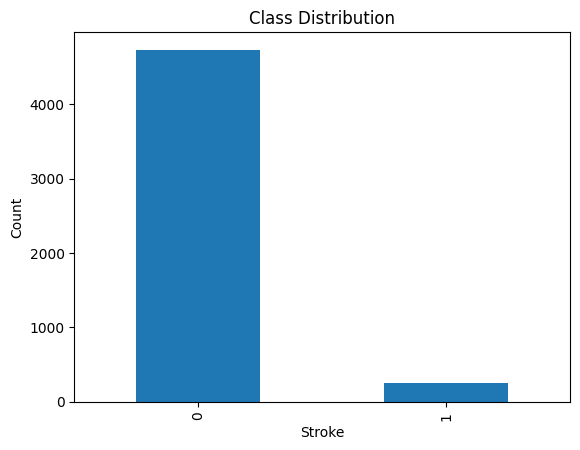

In [ ]:
# Count the number of instances for each class in the target variable 'stroke'
# The value_counts() function gives the count of unique values in the 'stroke' column and it represents the distribution of classes
class_distribution = stroke_data['stroke'].value_counts()

# Display the class distribution using a print statement
# This prints the number of occurrences of each class (0 for no stroke, 1 for stroke) in the target variable
print("Class distribution in the target variable:\n", class_distribution)

# Plot the class distribution using a bar chart to visualize the number of instances in each class
class_distribution.plot(kind='bar')  # Use the plot() function with kind='bar' to create a bar chart
plt.title('Class Distribution') # Set the title of the plot to 'Class Distribution'
plt.xlabel('Stroke') # Label the x-axis as 'Stroke' to indicate the target variable
plt.ylabel('Count') # Label the y-axis as 'Count' to show the number of instances for each class
plt.show() # Display the bar chart


**Separate the dataset into input (X) and output (Y) variables**


Separating the dataset into input (X) and output (Y) variables before normalization ensures that only features (X) are scaled, preserving the integrity of the target variable (Y) because its values remain accurate and unaltered, preventing distortion in predictions and maintaining the true relationship between input and output during modeling.

In [ ]:
# Separate the dataset into input (X) and output (Y) variables
# X contains the input features and Y contains the target variable (output)

# Take the first 10 columns (from index 0 to 9) from stroke_data to use as input features (X)
# iloc is used for positional indexing, selecting rows and columns by their integer position
X = stroke_data.iloc[:, 0:10]

# Select the 11th column (located at index 10) as the target variable Y from stroke_data
Y = stroke_data.iloc[:, 10]

# Print the input features X to check that the input data has separated correctly
print(X)

# Print the input features X to check that the input data has separated correctly
print(Y)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   67             0              1             1          1   
1          1   80             0              1             1          1   
2          0   49             0              0             1          1   
3          0   79             1              0             1          2   
4          1   81             0              0             1          1   
...      ...  ...           ...            ...           ...        ...   
4976       1   41             0              0             0          1   
4977       1   40             0              0             1          1   
4978       0   45             1              0             1          0   
4979       1   40             0              0             1          1   
4980       0   80             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1             22

**Normalize feature variables**

Normalize feature variables to ensure they are on the same scale, improving model performance, convergence speed, and preventing certain features from dominating others during training.

In [ ]:
# Initialize the StandardScaler instance that will be used for scaling the features.
scaler = StandardScaler()

# Fit the scaler to the input features (X) and transform
# The fit_transform() method first computes the mean and standard deviation for scaling and then transforms the data
scaled_X = scaler.fit_transform(X)

# Print the scaled feature variables to verify normalization
# The scaled_X array will have the same shape as X, but each feature will have a mean of 0 and a standard deviation of 1
print(scaled_X)


[[ 1.18390850e+00  1.04011079e+00 -3.26185770e-01 ...  2.72341090e+00
   1.19323816e+00 -3.53933192e-01]
 [ 1.18390850e+00  1.61326088e+00 -3.26185770e-01 ... -5.22766599e-04
   5.89389611e-01  5.78839946e-01]
 [-8.44659868e-01  2.46518357e-01 -3.26185770e-01 ...  1.44852918e+00
   8.69221866e-01  1.51161308e+00]
 ...
 [-8.44659868e-01  7.01644829e-02  3.06573766e+00 ... -2.42364234e-01
   4.86293516e-01  1.51161308e+00]
 [ 1.18390850e+00 -1.50277859e-01 -3.26185770e-01 ... -4.88199415e-01
   2.21189274e-01  1.51161308e+00]
 [-8.44659868e-01  1.61326088e+00  3.06573766e+00 ... -4.92415000e-01
   8.86371531e-02  5.78839946e-01]]


**Handle class imbalance using SMOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. Application of SMOTE to overcome class imbalance problems by artificially generating samples for the minority class prevents one-sided models that bias towards the majority class and increases the performance of classification.

In [ ]:
# Initialize the SMOTE instance with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled feature variables (scaled_X) and target variable (Y) to balance the class distribution
# This will synthetically create new minority class examples using the `fit_resample()` function, returning the resampled dataset.
X_resampled, y_resampled = smote.fit_resample(scaled_X, Y)

# Split the resampled dataset into training and testing sets
# X_resampled and y_resampled are split into training (X_train, y_train) and testing (X_test, y_test) sets
# test_size=0.3 specifies that 30% of the data will be used for testing, and random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# **Logistic Regression Classifier**

Logistic Regression Classifier can be considered as a binary classifier in case of machine learning. The probability percentage of an outcome belonging to one of two classes is predicted by it based on features.

Hyperparameter tuning involves selecting the best set of hyperparameters for a machine learning model to improve its performance. It is very important because the right choice of hyperparameters will advance the accuracy and efficiency of the model.

**Logistic Regression Classifier - Without Hyperparameter tuning**

In [ ]:

#StandardScaler function is called for scaling the train and test data
scaler = StandardScaler()

# Fit the Scaler on Training Data and Transform the Training Data
# This will scale the training data to have a mean of 0 and a standard deviation of 1
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data set using same fitted scaler on the training data
# It is imperative that same scaler should be used to scale training data and scale test data
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with a fixed random state for reproducibility and set max_iter to 1000
# Logistic Regression is a linear model commonly used for binary classification tasks
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the trained model
y_pred = log_reg.predict(X_test_scaled)

# Calculate various evaluation metrics to assess the performance of the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred)  # Calculate the precision of the model
recall = recall_score(y_test, y_pred)  # Calculate the recall of the model
f1 = f1_score(y_test, y_pred)  # Calculate the F1 score of the model

# Calculate the confusion matrix to see the breakdown of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results of the evaluation metrics
results = {
    "Accuracy": f"{accuracy:}",
    "Precision": f"{precision:}",
    "Recall": f"{recall:}",
    "F1 Score": f"{f1:}"
}

# Print each metric's result to the console
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print the confusion matrix to show the number of correct and incorrect predictions
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7753521126760563
Precision: 0.7623762376237624
Recall: 0.8060013956734124
F1 Score: 0.7835820895522388
Confusion Matrix:
 [[1047  360]
 [ 278 1155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1407
           1       0.76      0.81      0.78      1433

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840



**Logistic Regression Classifier - With Hyperparameter tuning**

In [ ]:
# Initialize the Logistic Regression model with a fixed random state for reproducibility
log_reg = LogisticRegression(random_state=42)

# Define a grid of hyperparameters to tune using GridSearchCV
# 'penalty' specifies the norm used in the penalization; 'C' is the inverse of regularization strength (smaller values are specify as stronger regularization)
# 'solver' indicates the algorithm to use for optimization; 'max_iter' is the maximum number of iterations taken for the solvers to converge
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types: L1 (Lasso) and L2 (Ridge)
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength: smaller values mean stronger regularization
    'solver': ['liblinear', 'saga'],  # Solvers compatible with the specified penalties: 'liblinear' supports both 'l1' and 'l2'; 'saga' is robust and supports both as well'
    'max_iter': [100, 200, 300]
}

# Set up GridSearchCV to search for the best combination of hyperparameters
# 'cv=5' means 5-fold cross-validation, accuracy optimizes by 'scoring=accuracy', 'n_jobs=-1' uses all available processors, and 'verbose=2' gives detailed output
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV on the training data to find the best combination of hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model with the optimal hyperparameters found during GridSearchCV
best_log_reg = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred = best_log_reg.predict(X_test)

# Calculate evaluation metrics to assess the performance of the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred)  # Calculate the precision of the model
recall = recall_score(y_test, y_pred)  # Calculate the recall of the model
f1 = f1_score(y_test, y_pred)  # Calculate the F1 score of the model

# Generate a confusion matrix to understand the number of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print a detailed classification report that includes precision, recall, F1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7778169014084507
Precision: 0.7614080834419817
Recall: 0.8150732728541521
F1 Score: 0.7873272665992586
Confusion Matrix:
 [[1041  366]
 [ 265 1168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1407
           1       0.76      0.82      0.79      1433

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840



**Logistic Regression Classifier - Confusion matrix**


A Confusion Matrix for a Logistic Regression Classifier is a table used to evaluate the model's performance. It displays four outcomes True Positives, True Negatives, False Positives, and False Negatives, helping assess the accuracy, precision, recall, and overall effectiveness of the classifier.

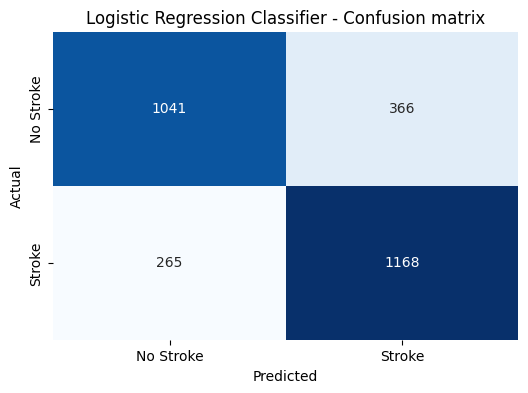

In [ ]:
# Compute the confusion matrix based on the actual labels (y_test) and the predicted labels (y_pred)
# The confusion matrix is a table that summarizes the performance of the classification model by
#displaying the counts of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure for plotting the confusion matrix with a specified size of 6x4 inches
plt.figure(figsize=(6, 4))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix,            # The confusion matrix data to be visualized, showing the counts of true/false positives and negatives
            annot=True,             # Annotate each cell with the actual count within the cell
            fmt="d",                # Format the annotations as integers."d" is decimal integers
            cmap="Blues",           # Use the "Blues" colormap to color the heatmap. The darker shades representing higher values
            cbar=False,             # Disable the color bar that would normally appear to the right of the heatmap
            xticklabels=['No Stroke', 'Stroke'],  # Label the x-axis ticks with 'No Stroke' and 'Stroke' to indicate predicted classes
            yticklabels=['No Stroke', 'Stroke'])  # Label the y-axis ticks with 'No Stroke' and 'Stroke' to indicate actual classes


# Set the labels for the x-axis and y-axis to show that the columns represent predicted labels and the rows represent actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title of the plot to describe that this confusion matrix is for the Logistic Regression classifier
plt.title('Logistic Regression Classifier - Confusion matrix')

# Display the plot
plt.show()

**Logistic Regression Classifier - ROC Curve**

The ROC Curve (Receiver Operating Characteristic) is a graph showing performance for a classifier, which plots the true positive rate against the false positive rate at various thresholds to provide a graphical means for comparing model accuracy.

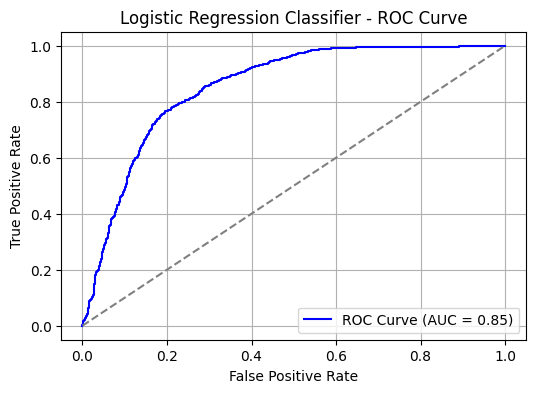

In [ ]:
# Generate probability scores for the test data
# predict_proba() is making the probability estimates for each class; [:, 1] selects the probabilities for the positive class (stroke)
y_probs = best_log_reg.predict_proba(X_test)[:, 1]  # To get the probabilities for the positive class (stroke)

# Compute the ROC curve using the true labels and the predicted probabilities for the positive class
# roc_curve() is making the false positive rate (fpr), true positive rate (tpr), and thresholds for different decision boundaries
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score, which summarizes the above graph and describes the performance of the classifier for any threshold value.
# roc_auc_score() calculates this area. The 1 represents perfect classification and 0.5 represents random guessing
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(6, 4)) # Create a figure for the plot with a size of 6x4 inches

# False Positive Rate is plotted on the x-axis, and True Positive Rate is plotted on the y-axis
plt.plot(fpr, tpr,                 # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis
         color='blue',             # Use the color blue to draw the ROC curve line
         label=f'ROC Curve (AUC = {auc:.2f})')  # Add a label for the curve, displaying the AUC value formatted to two decimal places
plt.plot([0, 1], [0, 1],           # Plot a line from point (0,0) to point (1,1), representing random chance (AUC = 0.5)
         color='grey',             # Use the color grey to draw this reference line
         linestyle='--')           # Use a dashed line style
plt.xlabel('False Positive Rate') # Label the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate') # Label the y-axis as 'True Positive Rate'
plt.title('Logistic Regression Classifier - ROC Curve') # Set the title of the plot
plt.legend(loc='lower right') # Place the legend in the lower right corner
plt.grid() # Add a grid to this plot to make it more readable
plt.show()   # Display the plot


**Logistic Regression Classifier - Feature Importance**

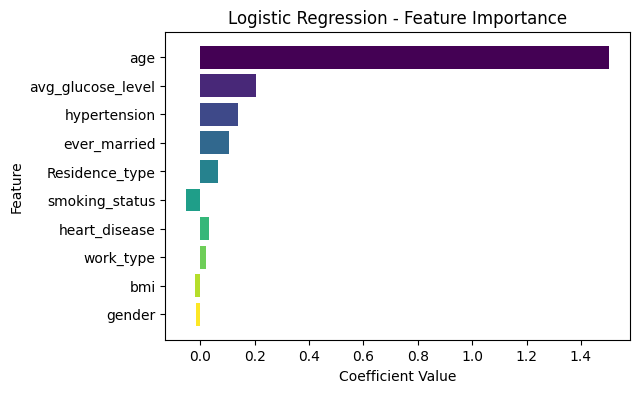

In [ ]:
# Extract the model's coefficients
# The coefficients (weights) showing the strength and direction of the relationship between each feature and the target variable
coefficients = best_log_reg.coef_[0]  # Get the coefficients for the features from the trained logistic regression model

# Create a DataFrame to hold feature names and their corresponding coefficients
# This DataFrame will help in visualizing and understanding the importance of each feature in the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,          # The names of the features (columns) from the original dataset
    'Importance': coefficients     # The corresponding coefficients from the logistic regression model
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['Absolute Importance'] = np.abs(feature_importance['Importance'])  # Calculate the absolute value of the coefficients
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)  # Sort features under their absolute importance

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(feature_importance))) # Create a colormap using the 'viridis' color map.It is generating a range of colors

# Plot the feature importance using a horizontal bar chart
plt.figure(figsize=(6, 4)) # Create a figure with a size of 6x4 inches for the plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors) # Plot a horizontal bar chart with features on the y-axis
                                                                                        # and their importance on the x-axis
plt.xlabel('Coefficient Value') # Label the x-axis as 'Coefficient Value'
plt.ylabel('Feature') # Label the y-axis as 'Feature'
plt.title('Logistic Regression - Feature Importance') # Set the title of the plot

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()


# **Random Forest Classifier**

**Random Forest Classifier - Without Hypertuning**

In [ ]:
# Initialize the Random Forest model
# The parameter n_estimators equals 100 denotes the quantity of trees, in the forest. Having more trees typically results in improved performance.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the Random Forest model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the trained model
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate various evaluation metrics to assess the performance of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate the accuracy of the model
precision_rf = precision_score(y_test, y_pred_rf) # Calculate the precision of the model
recall_rf = recall_score(y_test, y_pred_rf) # Calculate the recall of the model
f1_rf = f1_score(y_test, y_pred_rf) # Calculate the F1 score of the model

# Calculate the confusion matrix to see the breakdown of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Display the results of the evaluation metrics
rf_results = {
    "Accuracy": f"{accuracy_rf:}",
    "Precision": f"{precision_rf:}",
    "Recall": f"{recall_rf:}",
    "F1 Score": f"{f1_rf:}"
}

# Print each metric's result to the console
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7778169014084507
Precision: 0.7614080834419817
Recall: 0.8150732728541521
F1 Score: 0.7873272665992586
Confusion Matrix:
 [[1333   74]
 [  70 1363]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1407
           1       0.76      0.82      0.79      1433

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840



**Random Forest Classifier - With Hypertuning**

In [ ]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)  # Initialize the model with a fixed random state for reproducibility


# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Method of selecting samples for training each tree
}

# Set up GridSearchCV to search for the best combination of hyperparameters
# 'cv=5' means 5-fold cross-validation, accuracy optimizes by 'scoring=accuracy', 'n_jobs=-1' uses all available processors, and 'verbose=2' gives detailed output
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
# This step fits the Random Forest model using all parameter combinations and selects the best one based on cross-validation performance
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_ # Retrieve the model with the best found hyperparameters
y_pred = best_rf.predict(X_test) # Predict the labels for the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)         # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred)       # Calculate the precision, the ratio of true positives to all predicted positives
recall = recall_score(y_test, y_pred)             # Calculate the recall,  the ratio of true positives to all actual positives
f1 = f1_score(y_test, y_pred)                     # Calculate the F1 score, the harmonic mean of precision and recall
conf_matrix = confusion_matrix(y_test, y_pred)    # Compute the confusion matrix. it shows the counts of true/false positives and negatives

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9538732394366197
Precision: 0.9603960396039604
Recall: 0.947662247034194
F1 Score: 0.9539866526167896
Confusion Matrix:
 [[1351   56]
 [  75 1358]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1407
           1       0.96      0.95      0.95      1433

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840



**Random Forest Classifier - Confusion Matrix**

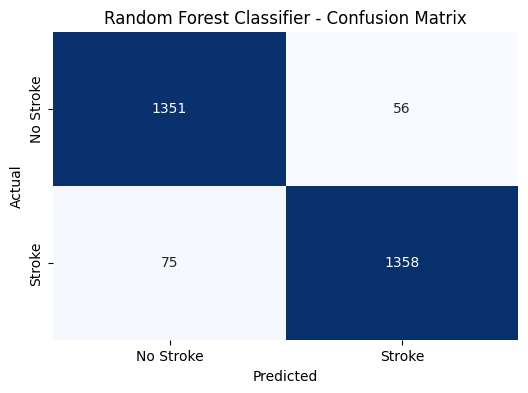

In [ ]:
#Generate predictions
y_pred = best_rf.predict(X_test)

# Compute the confusion matrix based on the actual labels (y_test) and the predicted labels (y_pred)
# The confusion matrix is a table that summarizes the performance of the classification model by
# displaying the counts of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure for plotting the confusion matrix with a specified size of 6x4 inches
plt.figure(figsize=(6, 4))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix,            # The confusion matrix data to be visualized, showing the counts of true/false positives and negatives
            annot=True,             # Annotate each cell with the actual count within the cell
            fmt="d",                # Format the annotations as integers."d" is decimal integers
            cmap="Blues",           # Use the "Blues" colormap to color the heatmap. The darker shades representing higher values
            cbar=False,             # Disable the color bar that would normally appear to the right of the heatmap
            xticklabels=['No Stroke', 'Stroke'],  # Label the x-axis ticks with 'No Stroke' and 'Stroke' to indicate predicted classes
            yticklabels=['No Stroke', 'Stroke'])  # Label the y-axis ticks with 'No Stroke' and 'Stroke' to indicate actual classes

# Set the labels for the x-axis and y-axis to show that the columns represent predicted labels and the rows represent actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title of the plot to describe that this confusion matrix is for the Random Forest Classifier
plt.title('Random Forest Classifier - Confusion Matrix')

# Display the plot
plt.show()

**Random Forest Classifier - ROC Curve**

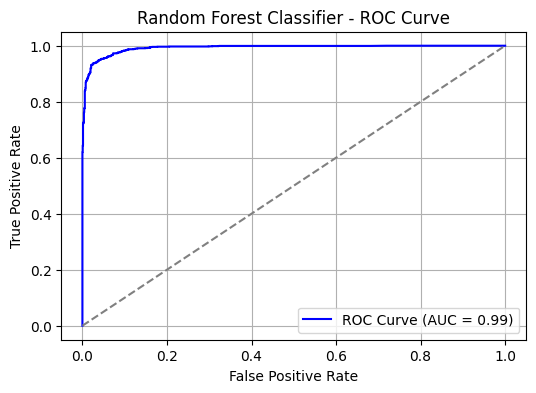

In [ ]:
# Generate probability scores for the test data
# predict_proba() is making the probability estimates for each class; [:, 1] selects the probabilities for the positive class (stroke)
y_probs = best_rf.predict_proba(X_test)[:, 1]  # To get the probabilities for the positive class (stroke)

# Compute the ROC curve using the true labels and the predicted probabilities for the positive class
# roc_curve() is making the false positive rate (fpr), true positive rate (tpr), and thresholds for different decision boundaries
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score, which summarizes the above graph and describes the performance of the classifier for any threshold value.
# roc_auc_score() calculates this area. The 1 represents perfect classification and 0.5 represents random guessing
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(6, 4)) # Create a figure for the plot with a size of 6x4 inches

# False Positive Rate is plotted on the x-axis, and True Positive Rate is plotted on the y-axis
plt.plot(fpr, tpr,                 # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis
         color='blue',             # Use the color blue to draw the ROC curve line
         label=f'ROC Curve (AUC = {auc:.2f})')  # Add a label for the curve, displaying the AUC value formatted to two decimal places
plt.plot([0, 1], [0, 1],           # Plot a line from point (0,0) to point (1,1), representing random chance (AUC = 0.5)
         color='grey',             # Use the color grey to draw this reference line
         linestyle='--')           # Use a dashed line style
plt.xlabel('False Positive Rate') # Label the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate') # Label the y-axis as 'True Positive Rate'
plt.title('Random Forest Classifier - ROC Curve') # Set the title of the plot
plt.legend(loc='lower right') # Place the legend in the lower right corner
plt.grid() # Add a grid to this plot to make it more readable
plt.show()   # Display the plot


**Random Forest Classifier - Feature Importance**

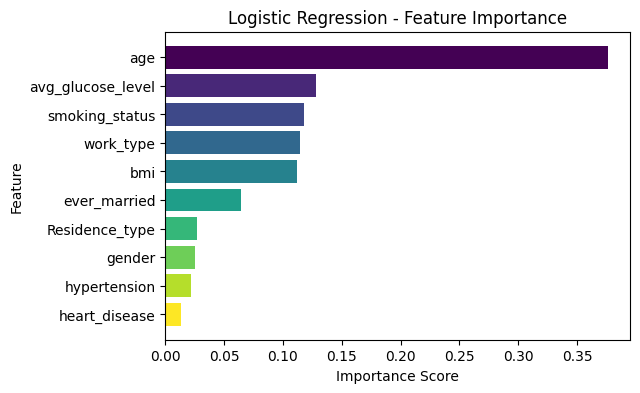

In [ ]:
# Extract feature importances
importances = best_rf.feature_importances_

# Create a DataFrame to hold feature names and their corresponding coefficients
# This DataFrame will help in visualizing and understanding the importance of each feature in the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,         # The names of the features (columns) from the original dataset
    'Importance': importances     # The corresponding importances from the lRandom Forest Classifier
})


# Sort the DataFrame by the importance scores in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(feature_importance))) # Create a colormap using the 'viridis' color map.It is generating a range of colors

# Plot the feature importance using a horizontal bar chart
plt.figure(figsize=(6, 4)) # Create a figure with a size of 6x4 inches for the plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors) # Plot a horizontal bar chart with features on the y-axis
                                                                                        # and their importance on the x-axis
plt.xlabel('Importance Score') # Label the x-axis as 'Importance Score'
plt.ylabel('Feature') # Label the y-axis as 'Feature'
plt.title('Logistic Regression - Feature Importance') # Set the title of the plot

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

# **Decision Tree Classifier**

**Decision Tree Classifier - Without Hypertuning**

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the trained model
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate various evaluation metrics to assess the performance of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt) # Calculate the accuracy of the model
precision_dt = precision_score(y_test, y_pred_dt) # Calculate the precision of the model
recall_dt = recall_score(y_test, y_pred_dt) # Calculate the recall of the model
f1_dt = f1_score(y_test, y_pred_dt) # Calculate the F1 score of the model

# Calculate the confusion matrix to see the breakdown of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred_dt)


# Display the results of the evaluation metrics
dt_results = {
    "Accuracy": f"{accuracy_dt:}",
    "Precision": f"{precision_dt:}",
    "Recall": f"{recall_dt:}",
    "F1 Score": f"{f1_dt:}"
}

# Print each metric's result to the console
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9538732394366197
Precision: 0.9603960396039604
Recall: 0.947662247034194
F1 Score: 0.9539866526167896
Confusion Matrix:
 [[1256  151]
 [ 122 1311]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1407
           1       0.96      0.95      0.95      1433

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840



**Decision Tree Classifier - With Hypertuning**

In [ ]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42) # Initialize the model with a fixed random state for reproducibility


# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],         # Measure of quality for splits
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at each leaf node
}

# Set up GridSearchCV to search for the best combination of hyperparameters
# 'cv=5' means 5-fold cross-validation, accuracy optimizes by 'scoring=accuracy', 'n_jobs=-1' uses all available processors, and 'verbose=2' gives detailed output
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_dt = grid_search.best_estimator_ # Retrieve the model with the best found hyperparameters
y_pred = best_dt.predict(X_test) # Predict the labels for the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)         # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred)       # Calculate the precision, the ratio of true positives to all predicted positives
recall = recall_score(y_test, y_pred)             # Calculate the recall,  the ratio of true positives to all actual positives
f1 = f1_score(y_test, y_pred)                     # Calculate the F1 score, the harmonic mean of precision and recall
conf_matrix = confusion_matrix(y_test, y_pred)    # Compute the confusion matrix. it shows the counts of true/false positives and negatives

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9024647887323943
Precision: 0.8953488372093024
Recall: 0.9134682484298674
F1 Score: 0.9043177892918826
Confusion Matrix:
 [[1254  153]
 [ 124 1309]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1407
           1       0.90      0.91      0.90      1433

    accuracy                           0.90      2840
   macro avg       0.90      0.90      0.90      2840
weighted avg       0.90      0.90      0.90      2840



**Visulization Decision Tree**

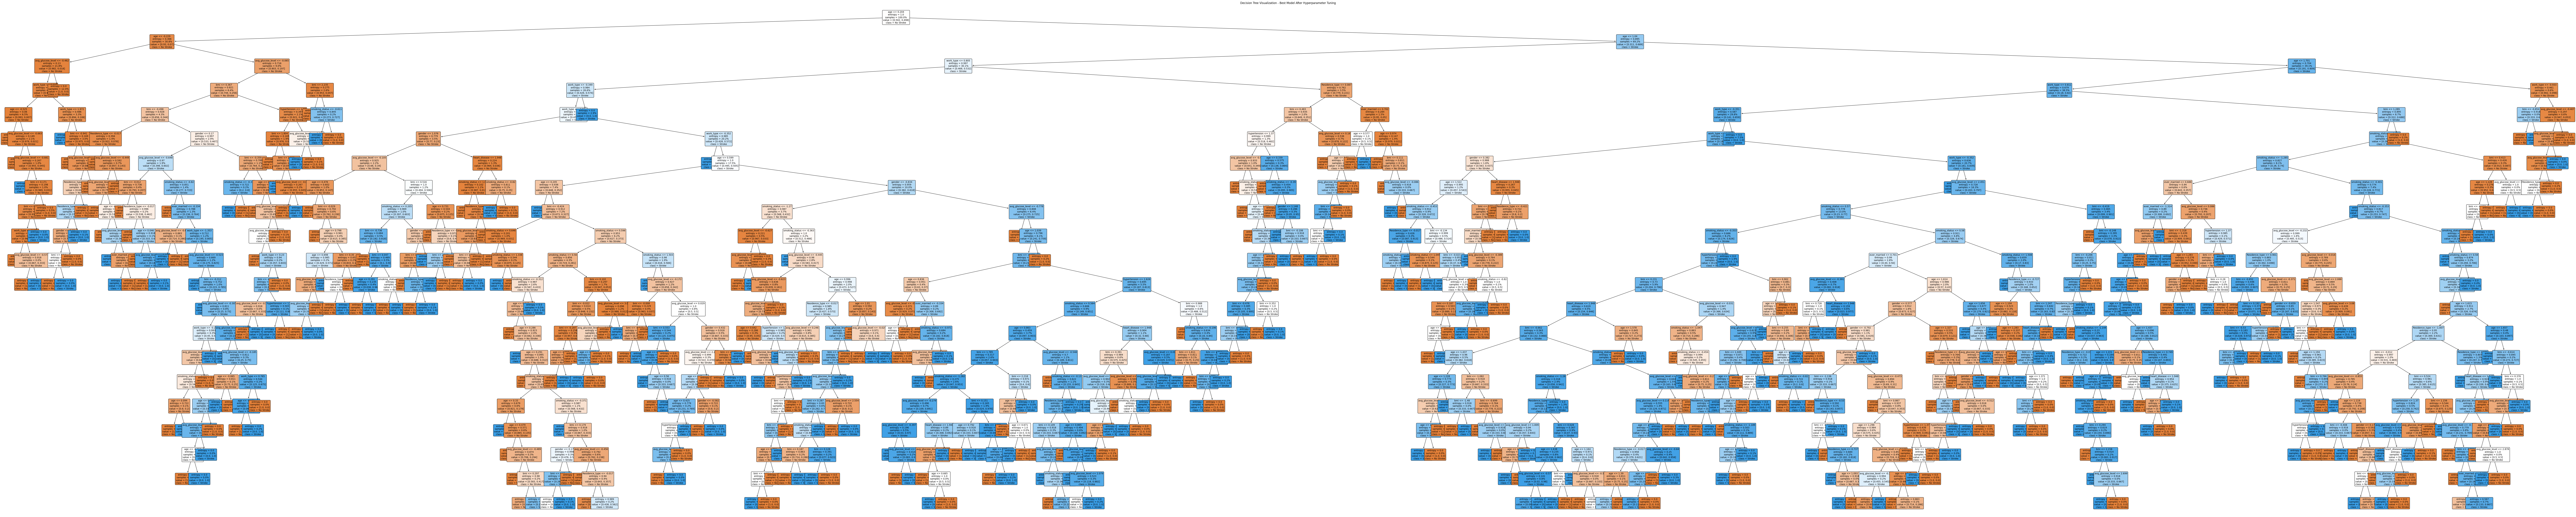

In [ ]:
# Set the size of the plot
# figsize=(200, 40) specifies the dimensions of the figure in inches, making it large enough to visualize the entire decision tree clearly
plt.figure(figsize=(200, 40))

# Plot the decision tree with features and class names
# plot_tree() is a function from sklearn that visualizes the structure of a decision tree
# best_dt is the trained decision tree model that resulted from hyperparameter tuning
plot_tree(best_dt,
          filled=True,               # Colors the nodes to indicate the majority class for each node
          feature_names=X.columns,   # Uses the feature names from the dataset for labeling the nodes
          class_names=['No Stroke', 'Stroke'],  # Tp labels the classes as 'No Stroke' and 'Stroke' instead of numeric values
          rounded=True,              # Rounds the corners of the nodes for a cleaner
          proportion=True,           # Scales the size of each node according to the proportion of samples it represents
          fontsize=10)               # Sets the font size for the text in the nodes to 10

# Set the title of the plot
plt.title("Decision Tree Visualization - Best Model After Hyperparameter Tuning")

# Display the plot
plt.show()


**Decision Tree Classifier - Confusion Matrix**

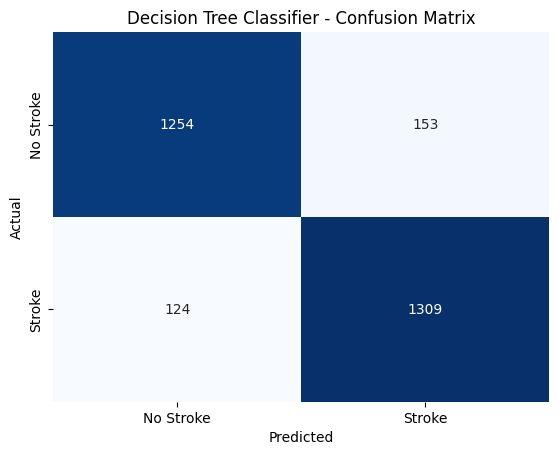

In [ ]:

# Generate predictions
y_pred = best_dt.predict(X_test)

# Compute the confusion matrix based on the actual labels (y_test) and the predicted labels (y_pred)
# The confusion matrix is a table that summarizes the performance of the classification model by
# displaying the counts of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix,            # The confusion matrix data to be visualized, showing the counts of true/false positives and negatives
            annot=True,             # Annotate each cell with the actual count within the cell
            fmt="d",                # Format the annotations as integers."d" is decimal integers
            cmap="Blues",           # Use the "Blues" colormap to color the heatmap. The darker shades representing higher values
            cbar=False,             # Disable the color bar that would normally appear to the right of the heatmap
            xticklabels=['No Stroke', 'Stroke'],  # Label the x-axis ticks with 'No Stroke' and 'Stroke' to indicate predicted classes
            yticklabels=['No Stroke', 'Stroke'])  # Label the y-axis ticks with 'No Stroke' and 'Stroke' to indicate actual classes


# Set the labels for the x-axis and y-axis to show that the columns represent predicted labels and the rows represent actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title of the plot to describe that this confusion matrix is for the Decision Tree Classifier
plt.title('Decision Tree Classifier - Confusion Matrix')

# Display the plot
plt.show()


**Decision Tree Classifier - ROC Curve**

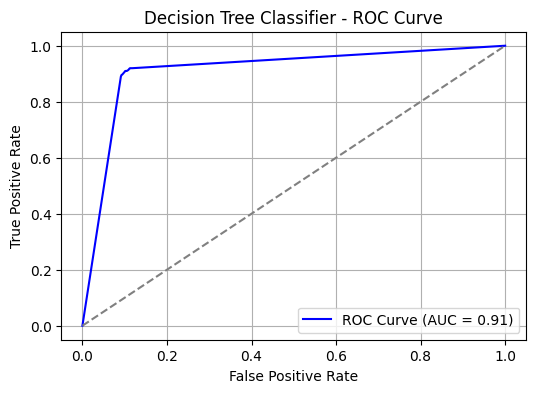

In [ ]:
# Generate probability scores for the test data
# predict_proba() is making the probability estimates for each class; [:, 1] selects the probabilities for the positive class (stroke)
y_probs = best_dt.predict_proba(X_test)[:, 1]  # To get the probabilities for the positive class (stroke)

# Compute the ROC curve using the true labels and the predicted probabilities for the positive class
# roc_curve() is making the false positive rate (fpr), true positive rate (tpr), and thresholds for different decision boundaries
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score, which summarizes the above graph and describes the performance of the classifier for any threshold value.
# roc_auc_score() calculates this area. The 1 represents perfect classification and 0.5 represents random guessing
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(6, 4)) # Create a figure for the plot with a size of 6x4 inches

# False Positive Rate is plotted on the x-axis, and True Positive Rate is plotted on the y-axis
plt.plot(fpr, tpr,                 # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis
         color='blue',             # Use the color blue to draw the ROC curve line
         label=f'ROC Curve (AUC = {auc:.2f})')  # Add a label for the curve, displaying the AUC value formatted to two decimal places
plt.plot([0, 1], [0, 1],           # Plot a line from point (0,0) to point (1,1), representing random chance (AUC = 0.5)
         color='grey',             # Use the color grey to draw this reference line
         linestyle='--')           # Use a dashed line style
plt.xlabel('False Positive Rate') # Label the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate') # Label the y-axis as 'True Positive Rate'
plt.title('Decision Tree Classifier - ROC Curve') # Set the title of the plot
plt.legend(loc='lower right') # Place the legend in the lower right corner
plt.grid() # Add a grid to this plot to make it more readable
plt.show()   # Display the plot

**Decision Tree Classifier - Feature Importance**

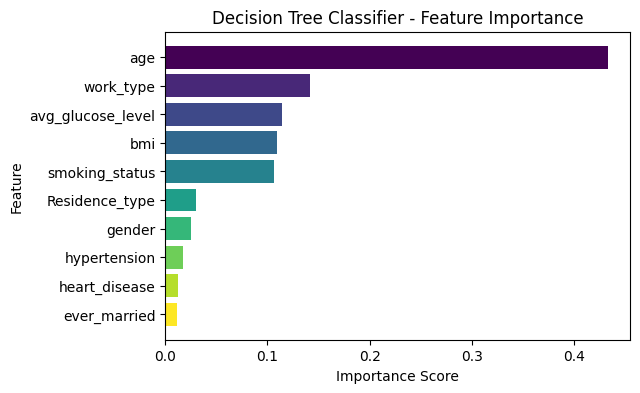

In [ ]:
# Extract feature importances
importances = best_dt.feature_importances_

# Create a DataFrame to hold feature names and their corresponding coefficients
# This DataFrame will help in visualizing and understanding the importance of each feature in the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,          # The names of the features (columns) from the original dataset
    'Importance': importances     # The corresponding coefficients from the logistic regression model
})

# Sort the DataFrame by the importance scores in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(feature_importance))) # Create a colormap using the 'viridis' color map.It is generating a range of colors

# Plot the feature importance using a horizontal bar chart
plt.figure(figsize=(6, 4)) # Create a figure with a size of 6x4 inches for the plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors) # Plot a horizontal bar chart with features on the y-axis
                                                                                        # and their importance on the x-axis
plt.xlabel('Importance Score') # Label the x-axis as 'Coefficient Value'
plt.ylabel('Feature') # Label the y-axis as 'Feature'
plt.title('Decision Tree Classifier - Feature Importance') # Set the title of the plot

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()


# **Support Vector Machine Classifier (SVM)**

The Support Vector Machine (SVM) Classifier is a supervised learning model that finds the optimal boundary to separate different classes. It's efficient for both linear and nonlinear datasets tending to achieve correct predictions by maximizing the margins that separate classes.

**SVM Classifier - Without Hypertuning**

In [ ]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the Random Forest model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the trained model
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate various evaluation metrics to assess the performance of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) # Calculate the accuracy of the model
precision_svm = precision_score(y_test, y_pred_svm) # Calculate the precision of the model
recall_svm = recall_score(y_test, y_pred_svm) # Calculate the recall of the model
f1_svm = f1_score(y_test, y_pred_svm) # Calculate the F1 score of the model

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Display the results with 8 decimal places
svm_results = {
    "Accuracy": f"{accuracy_svm:}",
    "Precision": f"{precision_svm:}",
    "Recall": f"{recall_svm:}",
    "F1 Score": f"{f1_svm:}"
}

# Print each metric's result to the console
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9024647887323943
Precision: 0.8953488372093024
Recall: 0.9134682484298674
F1 Score: 0.9043177892918826
Confusion Matrix:
 [[1086  321]
 [ 162 1271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1407
           1       0.90      0.91      0.90      1433

    accuracy                           0.90      2840
   macro avg       0.90      0.90      0.90      2840
weighted avg       0.90      0.90      0.90      2840



**SVM Classifier - With Hypertuning**

In [ ]:
# Define the SVM model with a linear kernel
# The 'kernel' parameter specifies the type of hyperplane used to separate the data
# A 'linear' kernel means that the model will attempt to find a linear decision boundary between classes
# probability=True enables the model to output probability estimates. Thi can be useful for some evaluation metrics
# random_state=42 ensures reproducibility by fixing the random number generation seed
svm = SVC(kernel='linear', probability=True, random_state=42)

# Define the hyperparameters to tune
# param_grid is a dictionary
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter 'C' controls the trade-off between achieving a low training error and a low testing error
    # Smaller values of 'C' create a wider margin but can happen some misclassifications and larger values of 'C'
    # aim to classify all training examples correctly, potentially at the cost of a smaller margin and overfitting
}

# Set up GridSearchCV to search for the best combination of hyperparameters
# 'cv=5' means 5-fold cross-validation, accuracy optimizes by 'scoring=accuracy', 'n_jobs=-1' uses all available processors, and 'verbose=2' gives detailed output
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
# This step fits the Random Forest model using all parameter combinations and selects the best one based on cross-validation performance
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_svm = grid_search.best_estimator_ # Retrieve the model with the best found hyperparameters
y_pred = best_svm.predict(X_test) # Predict the labels for the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)         # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred)       # Calculate the precision, the ratio of true positives to all predicted positives
recall = recall_score(y_test, y_pred)             # Calculate the recall,  the ratio of true positives to all actual positives
f1 = f1_score(y_test, y_pred)                     # Calculate the F1 score, the harmonic mean of precision and recall
conf_matrix = confusion_matrix(y_test, y_pred)    # Compute the confusion matrix. it shows the counts of true/false positives and negatives

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 0.1}
Accuracy: 0.777112676056338
Precision: 0.7560819462227913
Recall: 0.8241451500348919
F1 Score: 0.7886477462437397
Confusion Matrix:
 [[1026  381]
 [ 252 1181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1407
           1       0.76      0.82      0.79      1433

    accuracy                           0.78      2840
   macro avg       0.78      0.78      0.78      2840
weighted avg       0.78      0.78      0.78      2840



**SVM Classifier - Confusion Matrix**

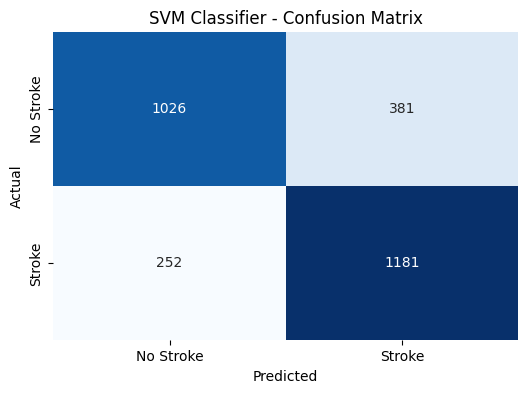

In [ ]:
# Generate predictions
y_pred = best_svm.predict(X_test)

# Compute the confusion matrix based on the actual labels (y_test) and the predicted labels (y_pred)
# The confusion matrix is a table that summarizes the performance of the classification model by
# displaying the counts of true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure for plotting the confusion matrix with a specified size of 6x4 inches
plt.figure(figsize=(6, 4))


# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix,            # The confusion matrix data to be visualized, showing the counts of true/false positives and negatives
            annot=True,             # Annotate each cell with the actual count within the cell
            fmt="d",                # Format the annotations as integers."d" is decimal integers
            cmap="Blues",           # Use the "Blues" colormap to color the heatmap. The darker shades representing higher values
            cbar=False,             # Disable the color bar that would normally appear to the right of the heatmap
            xticklabels=['No Stroke', 'Stroke'],  # Label the x-axis ticks with 'No Stroke' and 'Stroke' to indicate predicted classes
            yticklabels=['No Stroke', 'Stroke'])  # Label the y-axis ticks with 'No Stroke' and 'Stroke' to indicate actual classes


# Set the labels for the x-axis and y-axis to show that the columns represent predicted labels and the rows represent actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set the title of the plot to describe that this confusion matrix is for the SVM Classifier
plt.title('SVM Classifier - Confusion Matrix')

# Display the plot
plt.show()


**SVM Classifier - ROC Curve**

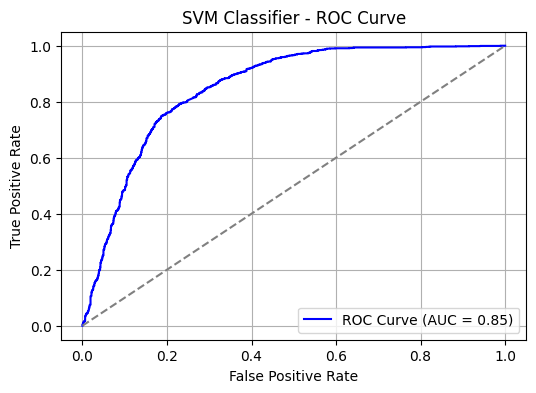

In [ ]:
# Generate probability scores for the test data
# predict_proba() is making the probability estimates for each class; [:, 1] selects the probabilities for the positive class (stroke)
y_probs = best_svm.predict_proba(X_test)[:, 1]  # To get the probabilities for the positive class (stroke)


# Compute the ROC curve using the true labels and the predicted probabilities for the positive class
# roc_curve() is making the false positive rate (fpr), true positive rate (tpr), and thresholds for different decision boundaries
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score, which summarizes the above graph and describes the performance of the classifier for any threshold value.
# roc_auc_score() calculates this area. The 1 represents perfect classification and 0.5 represents random guessing
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(6, 4)) # Create a figure for the plot with a size of 6x4 inches

# False Positive Rate is plotted on the x-axis, and True Positive Rate is plotted on the y-axis
plt.plot(fpr, tpr,                 # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis
         color='blue',             # Use the color blue to draw the ROC curve line
         label=f'ROC Curve (AUC = {auc:.2f})')  # Add a label for the curve, displaying the AUC value formatted to two decimal places
plt.plot([0, 1], [0, 1],           # Plot a line from point (0,0) to point (1,1), representing random chance (AUC = 0.5)
         color='grey',             # Use the color grey to draw this reference line
         linestyle='--')           # Use a dashed line style
plt.xlabel('False Positive Rate') # Label the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate') # Label the y-axis as 'True Positive Rate'
plt.title('SVM Classifier - ROC Curve') # Set the title of the plot
plt.legend(loc='lower right') # Place the legend in the lower right corner
plt.grid() # Add a grid to this plot to make it more readable
plt.show()   # Display the plot


**SVM Classifier - Feature Importance**

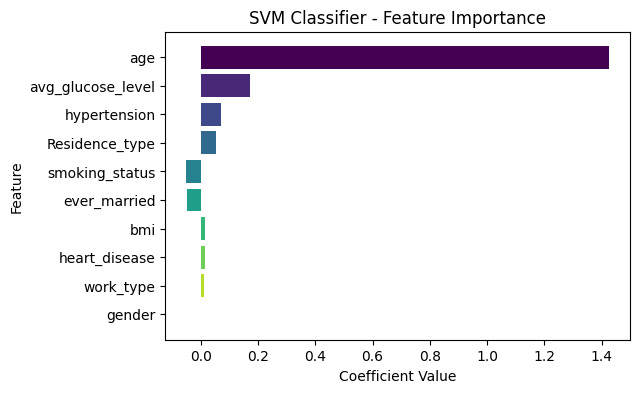

In [ ]:
# Extract the model's coefficients
# The coefficients (weights) showing the strength and direction of the relationship between each feature and the target variable
coefficients = best_svm.coef_[0]  # Get the coefficients for the features from the trained logistic regression model


# Create a DataFrame to hold feature names and their corresponding coefficients
# This DataFrame will help in visualizing and understanding the importance of each feature in the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,          # The names of the features (columns) from the original dataset
    'Importance': coefficients     # The corresponding coefficients from the logistic regression model
})


# Sort the DataFrame by the absolute value of the coefficients
feature_importance['Absolute Importance'] = np.abs(feature_importance['Importance']) # Calculate the absolute value of the coefficients
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False) # Sort features under their absolute importance

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(feature_importance))) # Create a colormap using the 'viridis' color map.It is generating a range of colors

# Plot the feature importance using a horizontal bar chart
plt.figure(figsize=(6, 4)) # Create a figure with a size of 6x4 inches for the plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors) # Plot a horizontal bar chart with features on the y-axis
                                                                                        # and their importance on the x-axis
plt.xlabel('Coefficient Value') # Label the x-axis as 'Coefficient Value'
plt.ylabel('Feature') # Label the y-axis as 'Feature'
plt.title('SVM Classifier - Feature Importance') # Set the title of the plot

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()



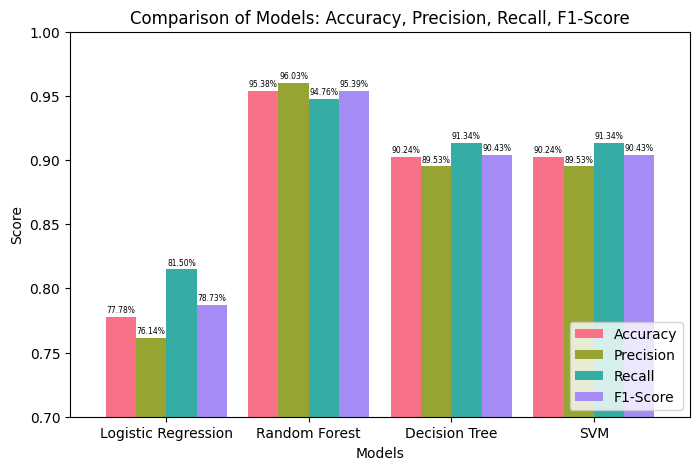

In [ ]:
# Define a dictionary with model performance metrics
model_metrics = {
    'Logistic Regression': {
        'Accuracy': 0.7778,
        'Precision': 0.7614,
        'Recall': 0.8150,
        'F1-Score': 0.7873,
        'ROC AUC': 0.85
    },
    'Random Forest': {
        'Accuracy': 0.9538,
        'Precision': 0.9603,
        'Recall': 0.9476,
        'F1-Score': 0.9539,
        'ROC AUC': 0.99
    },
    'Decision Tree': {
        'Accuracy': 0.9024,
        'Precision': 0.8953,
        'Recall': 0.9134,
        'F1-Score': 0.9043,
        'ROC AUC': 0.91
    },
    'SVM': {
        'Accuracy': 0.9024,
        'Precision': 0.8953,
        'Recall': 0.9134,
        'F1-Score': 0.9043,
        'ROC AUC': 0.85
    }
}

# Convert the dictionary to a DataFrame for easier plotting
# The .T transposes the DataFrame because of that the models are the rows and the metrics are the columns
metrics_df = pd.DataFrame(model_metrics).T

# Creates a palette with 4 distinct colors using the HUSL color space
palette = sns.color_palette("husl", 4)

# Create a bar plot using the metrics DataFrame
# 'kind' is set to 'bar' for a bar plot, 'figsize' sets the size of the plot, and 'color' applies the color palette
# 'width' sets the width of the bars, and a value less than 1 creates spaces between the bars
ax = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(8, 5), color=palette, width=0.85)

# Set the title of the plot
plt.title('Comparison of Models: Accuracy, Precision, Recall, F1-Score')

# Set the limits of the y-axis to focus on the range of interest (0.7 to 1)
plt.ylim(0.7, 1)

# Label the y-axis as 'Score'
plt.ylabel('Score')

# Label the x-axis as 'Models'
plt.xlabel('Models')

# Set the rotation of x-axis labels to 0 for better readable
plt.xticks(rotation=0)

# Position the legend in the lower right corner of the plot
plt.legend(loc='lower right')

# Annotate each bar with the percentage value of the metric it represents
# ax.patches contains all the rectangular bars in the plot
for p in ax.patches:
    # Annotate the bar with its height centered at the top of the bar
    ax.annotate(f'{p.get_height():.2%}',  # Convert the height of the bar to a percentage string with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation at the center-top of the bar
                ha='center', va='baseline', fontsize=5.5, color='black',  # Horizontal and vertical alignment, font size, and color of the text
                xytext=(0, 3),  # Offset the text slightly above the top of the bar
                textcoords='offset points')  # Specify that the offset is in points

# Display the plot
plt.show()


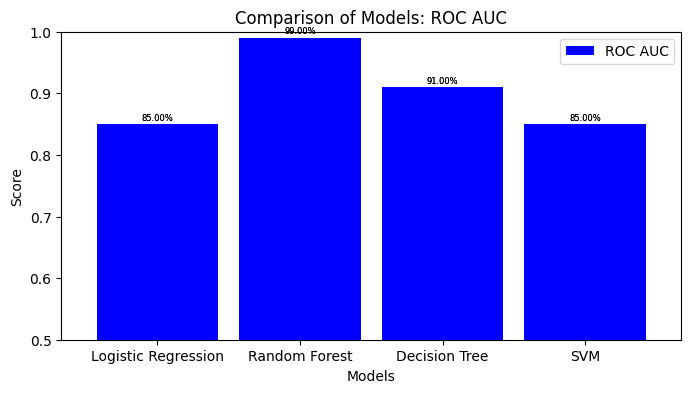

In [ ]:
# Plot the ROC AUC comparison separately
# Create a bar plot specifically for comparing the ROC AUC scores of the models
ax = metrics_df[['ROC AUC']].plot(kind='bar',     # Generate a bar plot for the 'ROC AUC' column
                                  figsize=(8, 4),  # Set the size of the plot to 8 inches wide and 4 inches tall
                                  color='blue',    # Use blue color for the bars representing ROC AUC
                                  width=0.85)      # Set the width of the bars to 0.85, leaving a small gap between them


# Set the title of the plot
plt.title('Comparison of Models: ROC AUC')

# Set the y-axis limits to focus on the range of interest
# This range is set from 0.5 to 1 because an ROC AUC of 0.5 indicates a model with no discrimination ability (random guessing)
plt.ylim(0.5, 1)

# Label the y-axis as 'Score'
plt.ylabel('Score')

# Label the x-axis as 'Models'
plt.xlabel('Models')

# Set the rotation of x-axis labels (model names) to 0 for better readability
plt.xticks(rotation=0)

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 3),
                textcoords='offset points')



# Annotate each bar with the percentage value of the ROC AUC score it represents
# ax.patches contains all the rectangular bars in the plot
for p in ax.patches:
    # Annotate the bar with its height centered at the top of the bar
    ax.annotate(f'{p.get_height():.2%}',          # Convert the height of the bar to a percentage string with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation at the center-top of the bar
                ha='center', va='baseline',       # Horizontal and vertical alignment
                fontsize=6, color='black',        # Font size is set to 6 for readable, and the text color is black
                xytext=(0, 3),                    # Offset the text slightly above the top of the bar
                textcoords='offset points')       # Specify that the offset is in points

# Display the plot
plt.show()